# Experiment 1
## Arm study

In [1]:
# Libraries
import math
import matplotlib.pyplot as plt
import random

In [2]:
# Define the horizon
T = 200
eps = 1/3
sigma = .1
T_plot = 300

In [15]:
# Define the arms
f1 = lambda x: 1 - 37/(37+x)
f2 = lambda x: .88*(1 - 10/(10+x))
f3 = lambda x: .78*(1 - 1/(1+x))
f4 = lambda x: .7*(1 - 10/(10+x))
f5 = lambda x: .5*(1 - 20/(20+x))

In [18]:
# Define the arm vector
arms = [f1, f2, f3, f4, f5]
convergence = [1, .88, .78, .7, .5]

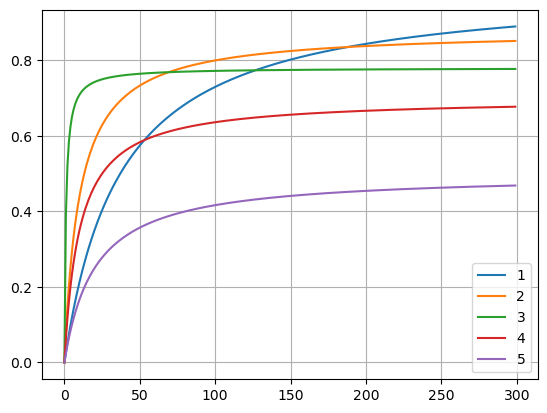

In [19]:
# Plot the Arms
plt.clf()

i = 1
for arm in arms:
    label = str(i)
    plt.plot([arm(j) for j in range(T_plot)], label=label)
    i += 1

plt.grid()
plt.legend(loc="best")

---

## Gamma Study

In [243]:
# define the gammas
df1 = lambda x: 40 * math.pow(40 + x, -2)
df2 = lambda x: .88 * 10 * math.pow(10 + x, -2)
df3 = lambda x: .7 * 10 * math.pow(10 + x, -2)
df4 = lambda x: .5 * 20 * math.pow(20 + x, -2)

beta = 2
beta_fun = lambda x: math.pow(x, -beta)

gammas = [df1, df2, df3, df4]

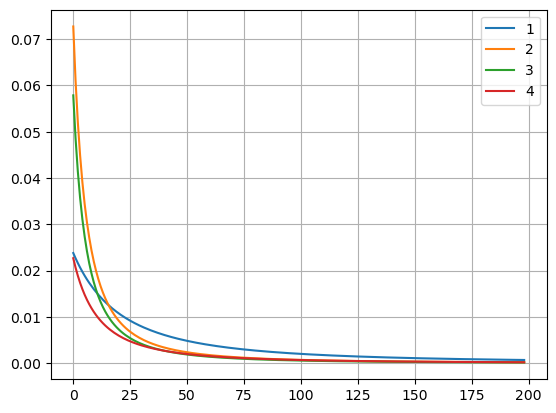

In [244]:
plt.clf()

i = 1
for arm in gammas:
    label = str(i)
    plt.plot([arm(j) for j in range(1, T)], label=label)
    i += 1

plt.grid()
plt.legend(loc="best")

---

## Oracle Info: UCB-SRB

In [245]:
# *** FIND GAPs and PHI ***
# compute the mu values at the horizon
mus = []
for elem in arms:
    mus.append(elem(T))
print("MUs: " + str(mus))

# find the mu_star
mu_star = max(mus)
print("MU*: " + str(mu_star))

# compute the optimality gaps
gaps = []
for elem in mus:
    gaps.append(mu_star - elem)
print("DELTAs: " + str(gaps))

# compute phi_{2/3}
phi = 0
for elem in gaps:
    if elem != 0:
        phi += pow(elem, -2 / 3)
print("PHI: " + str(phi))

# *** FIND a ***
# compute the numerator
if beta >= 1.5:
    num = (pow(T/phi, 0.5) - pow(1-2*eps, -beta))**2
elif beta > 1:
    num = (pow(T, beta-1)/pow(phi, beta) - pow(1-2*eps, -beta))**2
else:
    print("Invalid beta.")
    num = 0

# compute the denominator
den = 4 * pow(sigma, 2) * pow(eps, -3)

# compute a
a = num/den
print("[INFO] a: " + str(a))

MUs: [0.8333333333333334, 0.838095238095238, 0.6666666666666666, 0.45454545454545453]
MU*: 0.838095238095238
DELTAs: [0.004761904761904634, 0.0, 0.17142857142857137, 0.3835497835497835]
PHI: 40.46501687458423
[INFO] a: 42.523383388802635


In [246]:
#### Find Gaps and PHI at convergence ####
mus_inf = convergence
gaps_inf = []
mu_star_inf = max(mus_inf)
for i in range(len(mus_inf)):
    gaps_inf.append(mu_star_inf - mus_inf[i])

phi_inf = 0
for elem in gaps_inf:
    if elem != 0:
        phi_inf += pow(elem, -2 / 3)

# *** FIND a ***
# compute the numerator
if beta >= 1.5:
    num = (pow(T/phi_inf, 0.5) - pow(1-2*eps, -beta))**2
elif beta > 1:
    num = (pow(T, beta-1)/pow(phi_inf, beta) - pow(1-2*eps, -beta))**2
else:
    print("Invalid beta.")
    num = 0

# compute the denominator
den = 4 * pow(sigma, 2) * pow(eps, -3)

# compute a
a_inf = num/den

print("MUs(inf): " + str(mus_inf))
print("Gaps(inf): " + str(gaps_inf))
print("Phi(inf): " + str(phi_inf))
print("a(inf): " + str(a_inf))

MUs(inf): [1, 0.88, 0.7, 0.5]
Gaps(inf): [0, 0.12, 0.30000000000000004, 0.5]
Phi(inf): 7.929197676126214
a(inf): 14.650283944152578


In [247]:
for i in [100, 200, 400, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2500]:
    if beta >= 1.5:
        num = (pow(i/phi_inf, 0.5) - pow(1-2*eps, -beta))**2
    elif beta > 1:
        num = (pow(i, beta-1)/pow(phi_inf, beta) - pow(1-2*eps, -beta))**2
    else:
        print("Invalid beta.")
        num = 0
    den = 4 * pow(sigma, 2) * pow(eps, -3)
    print(str(num/den))

27.489359696262568
14.650283944152578
3.33356470591089
1.0102585150766095
4.605137318520438
10.09560738221269
17.022464208964983
25.086510665364663
34.07992371277205
43.85138866173809
70.9952516151701


In [248]:
# Upper bound for the error
e_ub = 2 * T * len(arms) * math.exp(-0.1*a)
print("[INFO] Error Probability Upper Bound: " + str(e_ub))

[INFO] Error Probability Upper Bound: 22.769469220909


In [249]:
# *** FIND THEORETICAL T ***
# compute the Ti
T_i = [0]*len(arms)
for i in range(len(arms)):
    if gaps_inf[i] != 0:
        T_i[i] = math.pow(.5 * (beta-1) * gaps_inf[i], 1/(-beta+1))
    else:
        T_i[i] = 0
T_theoretical = math.ceil(max(T_i))

print("[INFO] Theoretical lower bound for the budget: " + str(T_theoretical))

[INFO] Theoretical lower bound for the budget: 17


---

## Oracle Info: SR-SRB

In [250]:
# *** Find Theoretical T ***
log_bar = 0.5
for i in range(2, len(arms) + 1):
    log_bar += math.pow(i, -1)
print("Log_bar(K) = " + str(log_bar))

gaps_sr = {}
for i in range(1, len(arms) + 1):
    # gaps_sr[i] = gaps[i-1]
    gaps_sr[i] = gaps_inf[i-1]
print("Gaps = " + str(gaps_sr))

T_isr = [0] * (len(arms)-1)
for i in range(len(arms) - 1):
    j = i + 1
    ph_id = len(arms) + 1 - j
    delta = max(gaps_sr.values())

    key = [k for k in gaps_sr if gaps_sr[k] == delta]
    key_max = random.choice(key)
    del gaps_sr[key_max]

    T_isr[i] = math.pow(delta, 1/(1-beta)) / (math.pow(2, 1/1-beta) * math.pow(log_bar * ph_id, beta/(1-beta)))

T_theo_sr = math.ceil(max(T_isr))
print("Theoretical Budget = " + str(T_theo_sr))

Log_bar(K) = 1.5833333333333333
Gaps = {1: 0, 2: 0.12, 3: 0.30000000000000004, 4: 0.5}
Theoretical Budget = 168


In [251]:
# *** Find Error Probability ***
gaps.sort()
H_list = []
for i in range(len(arms)):
    H_list.append( (i+1) * math.pow(gaps[i], -2)) if gaps[i] != 0 else 0
H = max(H_list)

e_ub_sr = 0.5 * len(arms) * (len(arms)-1) * math.exp(-eps/(8 * math.pow(sigma, 2)) * (T-len(arms))/(log_bar*H))

print("H2 = " + str(H))
print("Error Probability Upper Bound = " + str(e_ub_sr))

H2 = 88200.00000000474
Error Probability Upper Bound = 5.965014676672702


---

## Oracle Info: UCB-E

In [253]:
H_1 = 0
for elem in gaps:
    if elem != 0:
        H_1 += math.pow(elem, -2)
a_bub = (25*(T-len(arms))) / (36*H_1)

print("H_1: " + str(H_1))
print("a Bubeck: " + str(a_bub))

H_1: 44140.82539203551
a Bubeck: 0.0030835651554370373
